<a href="https://colab.research.google.com/github/Becode-turing-5-30/flood-sound-detection/blob/main/start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup for connecting Google Colab -> Google Drive -> GitHub

In [1]:
# Mount your Google Drive
from google.colab import drive # import drive from google colab
from os.path import join  

ROOT = '/content/drive'     # default for the drive in colab
MY_GOOGLE_DRIVE_PATH = 'My Drive/ML-Projects/flood-sound-detection' # path to your project on Google Drive

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print("PROJECT_PATH: ", PROJECT_PATH) 

drive.mount(ROOT)           # we mount the drive

PROJECT_PATH:  /content/drive/My Drive/ML-Projects/flood-sound-detection
Mounted at /content/drive


In [2]:
# GitHub Repository setup

# API KEY from json
import json
ENV_JSON_PATH = f'{ROOT}/My Drive/ML-Projects/env.json' # replace with the path with your json with token api
with open(ENV_JSON_PATH) as f:
  r = json.load(f)
  my_token = r["TOKEN"]

# GIT
GIT_USERNAME = "Becode-turing-5-30"                     # replace with your Github username 
GIT_TOKEN = my_token
GIT_REPOSITORY = "flood-sound-detection"                # Replace with your github repository in this case we want 

GIT_PATH = f"https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git"

In [ ]:
%cd {PROJECT_PATH}
%pwd

/content/drive/My Drive/ML-Projects/flood-sound-detection


'/content/drive/My Drive/ML-Projects/flood-sound-detection'

# Git Clone

In [ ]:
# GIT CLONE on mounted Google drive if not done yet.
%cd {PROJECT_PATH}
!git clone "{GIT_PATH}" . # clone the github repository

/content/drive/My Drive/ML-Projects/flood-sound-detection
fatal: destination path '.' already exists and is not an empty directory.


In [4]:
# Change to current project directory
%cd {PROJECT_PATH} 

/content/drive/My Drive/ML-Projects/flood-sound-detection


# Git Pull

In [ ]:
!git fetch
!git pull origin main

From https://github.com/Becode-turing-5-30/flood-sound-detection
 * branch            main       -> FETCH_HEAD
Already up to date.


# GitHub useful commands

In [5]:
# Check statuses of the files that changed
!git status 

On branch dl2drive
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   start_ytextraction.ipynb
	modified:   youtube-extraction.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	URL/df_2124.csv
	URL/df_3540.csv

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
# Create branch and checkout
!git checkout -b dl2drive 

M	start_here.ipynb
Switched to a new branch 'dl2drive'


In [ ]:
# checkout
!git checkout main --force

Switched to branch 'main'
Your branch is behind 'origin/main' by 17 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)


# GitHub commit changes and push

In [6]:
# Add / track changed files
!git add .

In [7]:
# Commit the changes
!git config --global user.email "kethien.ng@gmail.com"
!git config --global user.name "KeThien"
!git commit -m '"Commit from colab: yt extraction - create csv"'

[dl2drive ffd5663] "Commit from colab: yt extraction - create csv"
 4 files changed, 5668 insertions(+), 2 deletions(-)
 create mode 100644 URL/df_2124.csv
 create mode 100644 URL/df_3540.csv
 rewrite start_ytextraction.ipynb (91%)


In [8]:
# Push the changes to GitHub Repository
!git push origin dl2drive

Counting objects: 7, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 83.58 KiB | 4.18 MiB/s, done.
Total 7 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 3 local objects.
To https://github.com/Becode-turing-5-30/flood-sound-detection.git
   800b64a..ffd5663  dl2drive -> dl2drive


# Dataframe process to shuffle chunk

In [ ]:
# imports
import pandas as pd

In [ ]:
%cd {PROJECT_PATH}

/content/drive/My Drive/ML-Projects/flood-sound-detection


In [ ]:
df = pd.read_csv('URL/database_final.csv')

In [ ]:
df['label1'].value_counts()

rain          3018
speech        1124
stream        1094
waterfall      806
ecoulement     162
splash          44
vehicule        29
boat            26
wave            20
ocean           17
animal           3
bain             1
robinet          1
Name: label1, dtype: int64

In [ ]:
df1 = df.sample(frac=0.5, random_state=1)
df1['label2'].value_counts()
df1

,YTID,debut,fin,label1,label2,label3,label4
324,7Cv7C_6KxEs,30,40,stream,NaN,NaN,NaN
6951,aDofvBPJJFo,70,80,speech,waterfall,stream,NaN
6831,DWmLuZ5s3KQ,30,40,wave,waterfall,NaN,NaN
6401,i4eFb5Z0wis,30,40,waterfall,NaN,NaN,NaN
2949,36ac6OBbdZM,0,10,rain,orage,orage,NaN
...,...,...,...,...,...,...,...
6002,3u3Do2iz354,20,30,waterfall,stream,NaN,NaN
3509,C0o9O_fbyMk,30,40,rain,NaN,NaN,NaN
4113,NbAbTiGsJZ8,160,170,rain,NaN,NaN,NaN
3645,DkFamvr8kEY,20,30,rain,vehicule,car,NaN


In [ ]:
df1.to_csv('URL/df_3540.csv', index=False)


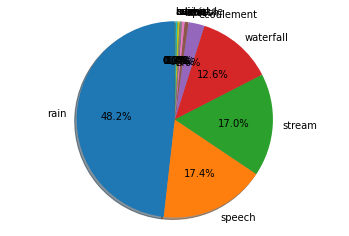

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df1['label1'].value_counts().index
sizes = df1['label1'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Launch Script to DL wav from youtube

In [ ]:
# Setup package
!pip install youtube-dl

     |████████████████████████████████| 1.9 MB 14.6 MB/s 


In [ ]:
!python youtube-extraction.py

Streaming output truncated to the last 5000 lines.
Deleting original file sounds/waterfall-3396.m4a (pass -k to keep)
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbi

# Rearrange wav sounds to folder YES and NO /!\ Caution

In [36]:
%pwd

'/content/drive/My Drive/ML-Projects/flood-sound-detection/sounds'

In [45]:
!ls

no  yes


In [44]:
%cd ..

/content/drive/My Drive/ML-Projects/flood-sound-detection/sounds


In [37]:
!mkdir no

In [41]:
!mv *.wav ./no

In [43]:
!rm *m4a*

rm: cannot remove '*m4a*': No such file or directory
